<a href="https://colab.research.google.com/github/SRARNAB7/HDS_5320_Arnab/blob/main/In_Class_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("Data-Week5.csv")
data.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,1,sat,82.1,3.7,9.3,2.9,5.3,78,3.1
1,1,sun,18.7,1.1,171.4,0.0,5.2,100,0.9


0.9975786924939467
1.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x=data.iloc[:,2:9]
y=data.iloc[:,0]

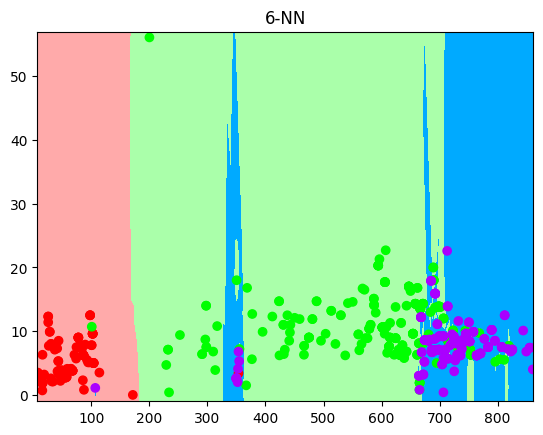

In [3]:
import matplotlib.pyplot as plt
import  numpy as np
from matplotlib.colors import ListedColormap


h = .2
n_neighbors = 6
X = x.values[:,2:4] #DC and ISI
Y = y # Target values month

#Define the model
clf = KNeighborsClassifier(n_neighbors, weights= 'distance')
clf.fit(X,y)

#make the frame
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

Z= clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

cmap_l =ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted
cmap_d =ListedColormap(['#FF0000','#00FF00','#AA00FF']) # actual
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted values on back
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_d) # actual values DC and ISI with darker colors
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("6-NN")
plt.show()



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.9974160206718347
0.9923076923076923
